In [ ]:
# !pip install pandas
# ! pip install matplotlib seaborn
# ! pip install Faker

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from faker import Faker
import os

def generate_names():
  """
  @brief: generate a set of 20 random names which are used to generate recodrs of name and age of different sizes later
  """

  fake = Faker()
  names = list()
  for i in range(20):
      names.append(fake.name())
  names.insert(0,"name")

  with open(f"/content/drive/MyDrive/DAA/data/name_repo.csv","w") as f:
      names = [f"{name}\n" for name in names]
      f.writelines(names)

if __name__ == "__main__":
  generate_names()

In [ ]:
%%writefile /content/drive/MyDrive/DAA/data/generator.py

import sys
import os
import pandas as pd
from random import random

def generate_data(n:int)->list:

    """
        @brief Function to generate random dataset of size n
        @input n:int Size of the dataset
        @return output:dict Dictionary of name and age
    """

    output = list()
    if n <= 0:
        return output
    else:
        names = pd.read_csv(f"/content/drive/MyDrive/DAA/data/name_repo.csv").sample(n,replace=True).name.values.reshape(-1,)
        for name in names:
            record = dict();
            age:float = round(random()*100,2)

            record['name'] = name
            record['age'] = age
            output.append(record)
        return output


if __name__ == '__main__':
    # get the arguments passed in the command line
    arg_list = sys.argv

    # default value of 10 for the dataset size
    n:int = 10

    if len(arg_list) > 1:
        if type(arg_list[1] == 'int'):
            n = int(arg_list[1])

    data = generate_data(n)
    with open(f"/content/drive/MyDrive/DAA/data/{n}_set.csv",'w') as f:
        for rec in data:
            name,age = rec['name'],rec['age']
            f.write(f"{name},{age}")
            f.write('\n')


Overwriting /content/drive/MyDrive/DAA/data/generator.py


In [ ]:

%%writefile /content/drive/MyDrive/DAA/practicals/sorting.h
#ifndef SORTING_H
#define SORTING_H

#include <iostream>

// Represents a person data type with a name and an age
struct Person
{
    std::string name; // name of the person
    double age;       // age of the person
};

// Data type which stores all the metrics
struct Report{
    int comparisons = 0;
    int assignments = 0;
    float time = 0.0;
};

// Represents data type for all the sorting algorithms that will be used in the practicals
class Sorting_Algorithms
{
private:
    Person *data; // array of Person data type
    int n;        // size of the array

public:
    // constructors
    Sorting_Algorithms();
    Sorting_Algorithms(int);
    ~Sorting_Algorithms();

    // getter and setter
    int getSize() const;
    void setSize(int);

    // display
    void display() const;

    // algorithms
    Report insertion_sort(size_t) const;
};

void generate_report_insertion_sort(size_t,size_t);
#endif

Overwriting /content/drive/MyDrive/DAA/practicals/sorting.h


In [ ]:
%%writefile /content/drive/MyDrive/DAA/practicals/sorting.cpp

#include "sorting.h"
#include <fstream>
#include <sstream>
#include <string>
#include <cstdlib>
#include <chrono>

// Default Contructor
Sorting_Algorithms::Sorting_Algorithms() : n(0)
{
    this->data = nullptr;
}

// Parameter Constructor
/**
 * @brief Initialize the data array
 * @param input_size {size_t} Number of persons
 */
Sorting_Algorithms::Sorting_Algorithms(int input_size) : n(input_size)
{

    /**
     * @details initialize the data array , runs the generator.py file to generate n number of random records,
     * opens the file containing generated data and stores them in the data array,
     */
    data = new Person[n];
    std::string generator_path = "python3 /content/drive/MyDrive/DAA/data/generator.py ";
    generator_path.append(std::to_string(n));
    std::system(generator_path.c_str());

    std::fstream strm;

    std::string input_path = "/content/drive/MyDrive/DAA/data/";
    input_path.append(std::to_string(n) + "_set.csv");
    strm.open(input_path, std::ios::in);

    if (strm.is_open())
    {
        std::string line;
        int iter1 = 0;
        srand(0);
        while (getline(strm, line))
        {
            std::stringstream ss(line);
            std::string value;

            std::string *temp = new std::string[2];
            int iter2 = 0;
            while (getline(ss, value, ','))
            {
                temp[iter2++] = value;
            }
            data[iter1].name = temp[0];
            data[iter1].age = atof(temp[1].c_str());
            ++iter1;
        }
        strm.clear();
        strm.close();
    }
    else
    {
        std::cerr << "There was an error opening the file";
    }
}

// destructor
Sorting_Algorithms::~Sorting_Algorithms()
{
    delete[] data;
}

// getter for the number of persons
int Sorting_Algorithms::getSize() const
{
    return n;
}

// setter for the number of persons
void Sorting_Algorithms::setSize(int input_size)
{
    n = input_size;
}

/**
 * @brief Sort the data array based on sort_field
 *
 * @param sort_field Index of the field used for sorting.
 * @return Time taken to sort the dataset
 * @details
 * Sorting behavior:
 *- 0 : Sort by age
 *- 1 : Sort by name
 *- 2 : Sort by name, using age as a tie-breaker
 *
 * If there is no data, the function returns immediately.
 */
Report Sorting_Algorithms::insertion_sort(size_t sort_field) const
{
    Report rep;
    if (!data)
    {
        std::cout << "There is no data" << std::endl;
        return rep;
    }
    else
    {
        auto start = std::chrono::steady_clock::now();
        switch (sort_field)
        {
        case 0:
            for (int i = 1; i < n; i++)
            {
                Person key = data[i];
                int j = i - 1;
                while (j >= 0)
                {
                  if(!data[j].name.compare(key.name) > 0)
                    break;

                  rep.comparisons++;
                  data[j + 1] = data[j];
                  rep.assignments++;
                  --j;
                }
                data[j + 1] = key;
                rep.assignments++;
            }
            break;
        case 1:
            for (int i = 1; i < n; i++)
            {
                Person key = data[i];
                int j = i - 1;
                while (j >= 0)
                {
                    if(!data[j].age > key.age)
                      break;
                    rep.comparisons++;
                    data[j + 1] = data[j];
                    rep.assignments++;
                    --j;
                }
                data[j + 1] = key;
                rep.assignments++;
            }
            break;
        case 2:
            for (int i = 1; i < n; i++)
            {
                Person key = data[i];
                int j = i - 1;
                while (j >= 0)
                {
                  if(!(data[j].name.compare(key.name) > 0 || (data[j].name.compare(key.name) == 0 && data[j].age > key.age)))
                    break;
                  rep.comparisons++;
                  data[j + 1] = data[j];
                  rep.assignments++;
                  --j;
                }

                data[j + 1] = key;
                rep.assignments++;
            }
            break;
        default:
            std::cout << "INVALID OPTION" << std::endl;
        }
        auto stop = std::chrono::steady_clock::now();
        std::chrono::duration<double> time = stop - start;
        rep.time = time.count();

        std::string output_path = "/content/drive/MyDrive/DAA/output/";
        output_path.append(std::to_string(n) + "_set.csv");
        std::fstream strm(output_path, std::ios::out);

        for (int i = 0; i < n; i++)
        {
            strm << data[i].name << "," << data[i].age << "\r";
        }
        strm.close();
        return rep;
    }
}
/**
 * @brief display contents of the data array
 * @param NA
 */
void Sorting_Algorithms::display() const
{
    for (int i = 0; i < n; i++)
    {
        std::cout << data[i].name << " - " << data[i].age << std::endl;
    }
}
/**
 * @brief Function to generate report for datasets of any size
 * @param dataset_size size of the dataset | option 0-> sorted by age, 1-> sorted by name, 2 -> sorted by name and age
 * @details
 * Create or edit a file called report.csv.
 * Generate 10 random datasets of size dataset_size and calculates the average running time,average number of comparisons and average number of assignments for the algorithm
 * and writes it in report_insertion_sort.csv file
 */
void generate_report_insertion_sort(size_t dataset_size, size_t option = 0)
{
    std::fstream strm("/content/drive/MyDrive/DAA/data/report_insertion_sort.csv", std::ios::app);
    Sorting_Algorithms s(dataset_size);

    double avg_time = 0;
    double avg_comparisons = 0;
    double avg_assignments = 0;

    for (int set = 0; set < 10; set++)
    {
        Sorting_Algorithms *s = new Sorting_Algorithms(dataset_size);
        Report rep = s->insertion_sort(option);
        avg_time += rep.time;
        avg_comparisons += rep.comparisons;
        avg_assignments += rep.assignments;

        delete s;
    }
    avg_time /= 10;
    avg_comparisons /= 10;
    avg_assignments /= 10;

    if (strm.is_open())
    {
        std::cout << "DATASET SIZE: " << dataset_size << " AVERAGE TIME: " << (avg_time) << " AVERAGE COMPARISONS: " << avg_comparisons << " AVERAGE ASSIGNMENTS: " << avg_assignments << std::endl;
        strm << dataset_size << "," << avg_time << "," << avg_comparisons << "," << avg_assignments << "\r";
        strm.close();
    }
}


Overwriting /content/drive/MyDrive/DAA/practicals/sorting.cpp


In [ ]:

%%writefile /content/drive/MyDrive/DAA/practicals/main.cpp
#include "sorting.h"

int main()
{
  // set of all the possible sizes of dataset

    const int dataset_sizes[] = {10, 20, 30, 40, 50, 60, 70};

    for(int size : dataset_sizes){
      // generate report for insertion sort
      generate_report_insertion_sort(size,2);
    }

    return 0;
}


Overwriting /content/drive/MyDrive/DAA/practicals/main.cpp


In [ ]:
%%writefile /content/drive/MyDrive/DAA/CMakeLists.txt
add_executable(sorting
               practicals/sorting.cpp
               practicals/main.cpp
               )

Overwriting /content/drive/MyDrive/DAA/CMakeLists.txt


In [ ]:
!cd /content/drive/MyDrive/DAA && mkdir build
!cd /content/drive/MyDrive/DAA/build && cmake .. && make

mkdir: cannot create directory ‘build’: File exists
CMake Warning (dev) in CMakeLists.txt:
  No project() command is present.  The top-level CMakeLists.txt file must
  contain a literal, direct call to the project() command.  Add a line of
  code such as

    project(ProjectName)

  near the top of the file, but after cmake_minimum_required().

  CMake is pretending there is a "project(Project)" command on the first
  line.
This warning is for project developers.  Use -Wno-dev to suppress it.

CMake Warning (dev) in CMakeLists.txt:
  cmake_minimum_required() should be called prior to this top-level project()
  call.  Please see the cmake-commands(7) manual for usage documentation of
  both commands.
This warning is for project developers.  Use -Wno-dev to suppress it.

-- Configuring done (0.0s)
-- Generating done (0.3s)
-- Build files have been written to: /content/drive/MyDrive/DAA/build
[-33%] Building CXX object CMakeFiles/sorting.dir/practicals/sorting.cpp.o
[  0%] Building CXX ob

In [ ]:
! chmod +x "/content/drive/MyDrive/DAA/data/generator.py"


In [ ]:
! rm /content/drive/MyDrive/DAA/data/report_insertion_sort.csv
! cd /content/drive/MyDrive/DAA/build && ./sorting

DATASET SIZE: 10 AVERAGE TIME: 5.0537e-06 AVERAGE COMPARISONS: 20.6 AVERAGE ASSIGNMENTS: 29.6
DATASET SIZE: 20 AVERAGE TIME: 1.22331e-05 AVERAGE COMPARISONS: 95.4 AVERAGE ASSIGNMENTS: 114.4
DATASET SIZE: 30 AVERAGE TIME: 2.60115e-05 AVERAGE COMPARISONS: 216.4 AVERAGE ASSIGNMENTS: 245.4
DATASET SIZE: 40 AVERAGE TIME: 2.72496e-05 AVERAGE COMPARISONS: 373.4 AVERAGE ASSIGNMENTS: 412.4
DATASET SIZE: 50 AVERAGE TIME: 5.3362e-05 AVERAGE COMPARISONS: 640.1 AVERAGE ASSIGNMENTS: 689.1
DATASET SIZE: 60 AVERAGE TIME: 7.38725e-05 AVERAGE COMPARISONS: 927.5 AVERAGE ASSIGNMENTS: 986.5
DATASET SIZE: 70 AVERAGE TIME: 0.000124557 AVERAGE COMPARISONS: 1247.9 AVERAGE ASSIGNMENTS: 1316.9


In [ ]:
"""@brief Function to generate line chart for the report generated by the sorting program
"""

report = pd.read_csv('/content/drive/MyDrive/DAA/data/report_insertion_sort.csv')

report.loc[len(report)] = report.columns
report.columns =['size','avg_time','avg_comparisons','avg_assignments']

report['size'] = report['size'].astype(int)
report['avg_time'] = report['avg_time'].astype(float)
report['avg_comparisons'] = report['avg_comparisons'].astype(float)
report['avg_assignments'] = report['avg_assignments'].astype(float)
report = report.sort_values('size')




[]

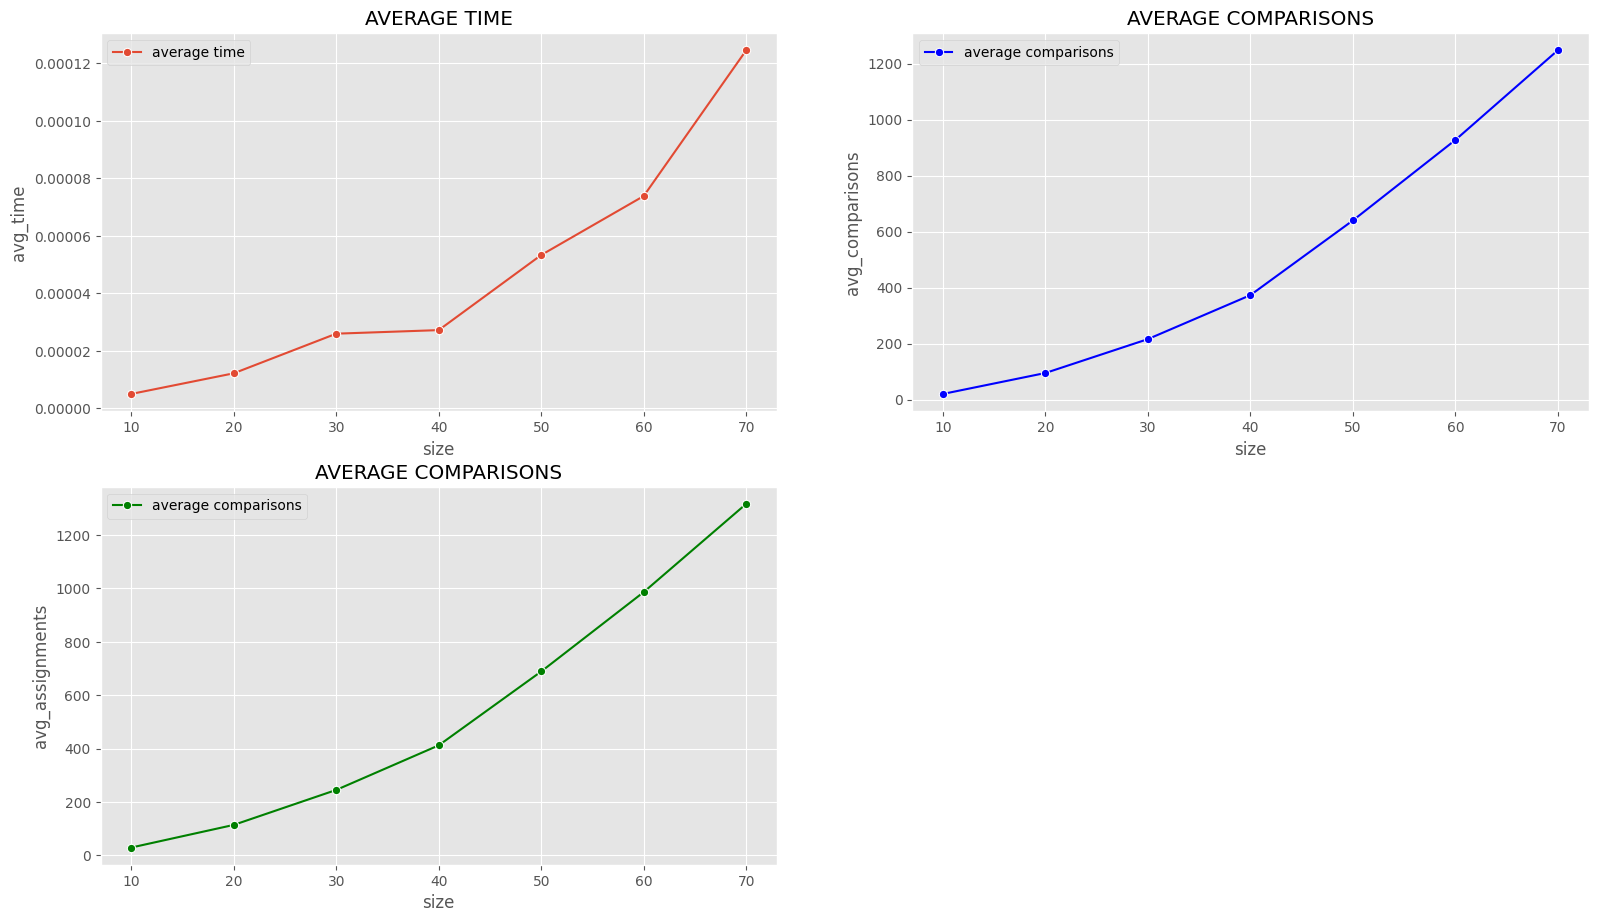

In [ ]:
# plotting
plt.style.use("ggplot")
plt.style.use("ggplot")
plt.figure(figsize=(19.2,10.8))

plt.subplot(2,2,1)
sns.lineplot(report,x="size",y="avg_time",marker="o")
plt.legend(["average time"])
plt.title("AVERAGE TIME")

plt.subplot(2,2,2)
sns.lineplot(report,x="size",y="avg_comparisons",color="blue",marker="o")
plt.legend(["average comparisons"])
plt.title("AVERAGE COMPARISONS")

plt.subplot(2,2,3)
sns.lineplot(report,x="size",y="avg_assignments",color="green",marker="o")
plt.legend(["average comparisons"])
plt.title("AVERAGE COMPARISONS")

# plt.savefig('/home/gaurang/d_drive/College Material/MCA_Sem2/DAA/charts/insertion_sort.png')
plt.plot()